Optical character recognition with numpy

In [ ]:
#load important libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from keras.utils import normalize
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#load dataset
digits_dataset = load_digits()

X= digits_dataset.data
y = digits_dataset.target

print('xshape : ',X.shape)
print('yshape : ',y.shape)

#normalization
scaler = StandardScaler()
X= scaler.fit_transform(X)

#split data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)


#build our model
class Multiclass:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.W1 = np.random.randn(self.input_size, self.hidden_size)
        self.b1 = np.zeros((1, self.hidden_size))
        self.W2 = np.random.randn(self.hidden_size, self.output_size)
        self.b2 = np.zeros((1, self.output_size))
        self.loss_history = []
        self.accuracy_history = []
    #fun to forward propagation
    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = np.tanh(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        exp_scores = np.exp(self.z2)
        self.probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    #fun to backward propagation
    def backward(self, X, y, learning_rate=0.01):
        m = X.shape[0]
        delta3 = self.probs
        delta3[range(m), y] -= 1
        dW2 = np.dot(self.a1.T, delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = np.dot(delta3, self.W2.T) * (1 - np.power(self.a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)

        # set w&b
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
     #train fun
    def train(self, X, y, epochs=2000):
        for i in range(epochs):
            self.forward(X)
            self.backward(X, y)
            # loss
            predictions = self.predict(X)
            #accuracy
            accuracy = np.mean(predictions == y)
            loss = self.calculate_loss(X, y)
            self.accuracy_history.append(accuracy)
            self.loss_history.append(loss)
            #print accuracy and loss
            if i % 100 == 0:
                print(f"Epoch {i}: Accuracy = {accuracy}, Loss = {loss}")

    #prediction fun
    def predict(self, X):
        self.forward(X)
        return np.argmax(self.probs, axis=1)
    #loss fun
    def calculate_loss(self, X, y):
        m = X.shape[0]
        correct_logprobs = -np.log(self.probs[range(m), y])
        data_loss = np.sum(correct_logprobs)
        return 1./m * data_loss

#  train our model
input_size = X_train.shape[1]
hidden_size = 100
output_size = len(np.unique(y_train))
model = Multiclass (input_size, hidden_size, output_size)
model.train(X_train, y_train)

# predict our model
predictions = model.predict(X_test)
accuracy = np.mean(predictions == y_test)
print("Final Accuracy:", accuracy)

xshape :  (1797, 64)
yshape :  (1797,)
Epoch 0: Accuracy = 0.7682672233820459, Loss = 4.160706565287284
Epoch 100: Accuracy = 1.0, Loss = 0.0002659826492300752
Epoch 200: Accuracy = 1.0, Loss = 0.00014080914418852393
Epoch 300: Accuracy = 1.0, Loss = 9.845534733363793e-05
Epoch 400: Accuracy = 1.0, Loss = 7.663286973204378e-05
Epoch 500: Accuracy = 1.0, Loss = 6.315519041097994e-05
Epoch 600: Accuracy = 1.0, Loss = 5.393162695812706e-05
Epoch 700: Accuracy = 1.0, Loss = 4.718414530134863e-05
Epoch 800: Accuracy = 1.0, Loss = 4.2011419775136826e-05
Epoch 900: Accuracy = 1.0, Loss = 3.7905999058743093e-05
Epoch 1000: Accuracy = 1.0, Loss = 3.455930429226369e-05
Epoch 1100: Accuracy = 1.0, Loss = 3.177209883874812e-05
Epoch 1200: Accuracy = 1.0, Loss = 2.940909973433506e-05
Epoch 1300: Accuracy = 1.0, Loss = 2.7373827050194155e-05
Epoch 1400: Accuracy = 1.0, Loss = 2.5593224125071147e-05
Epoch 1500: Accuracy = 1.0, Loss = 2.4008352907094533e-05
Epoch 1600: Accuracy = 1.0, Loss = 2.2578625

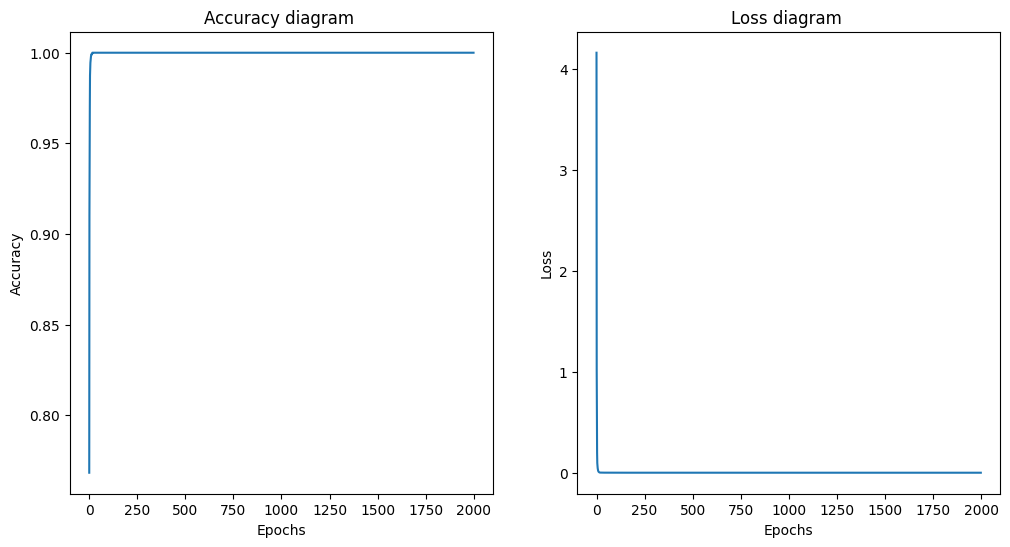

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(model.accuracy_history)
plt.title('Accuracy diagram ')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(model.loss_history)
plt.title('Loss diagram ')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()